# Clean and Analyze Employee Exit Surveys

---

## 1. Introduction

In this project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. Here are the links to the [DETE](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey) and [TAFE](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) datasets used.

The objectives are to inform the stakeholders on the following:

- **Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?**
- **Are younger employees resigning due to some kind of dissatisfaction? What about older employees?**

--- 

## 2. Open and Read the Data

Here is a preview of a couple columns we'll work with from the DETE and TAFE datasets:

| Dataset | Column | Description |
| - | - | - |
| DETE | `ID` | An id used to identify the participant of the survey |
| DETE | `SeparationType` | The reason why the person's employment ended |
| DETE | `Cease Date` | The year or month the person's employment ended |
| DETE | `DETE Start Date` | The year the person began employment with the DETE |
| TAFE | `Record ID` | An id used to identify the participant of the survey |
| TAFE | `Reason for ceasing employment` | The reason why the person's employment ended |
| TAFE | `LengthofServiceOverall` | Overall Length of Service at Institute (in years): The length of the person's employment (in years) |

Let's commence by opening and reading the data.

In [1]:
import pandas as pd
import numpy as np

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [2]:
# Read dete data
print('Summary of the columns in dete data:')
print(dete_survey.info())
print('\n')

# Print first 5 rows
print('Sample of dete data:')
dete_survey.head()

Summary of the columns in dete data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career m

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
# Read tafe data
print('Summary of the columns in tafe data:')
print(tafe_survey.info())
print('\n')

# Print first 5 rows
print('Sample of tafe data:')
tafe_survey.head()

Summary of the columns in tafe data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                             

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


We notice that:
- Missing values in the dete_survey dataframe are indicated as `Not Stated` instead of `NaN`.
- Both the dete_survey and tafe_survey dataframes contain many columns that are not required for our analysis e.g. `Aboriginal` in dete_survey
- Each dataframe contains many similar columns with different column names e.g. `Cease Date` in dete_survey, `CESSATION YEAR` in tafe_survey
- There are multiple columns/answers that indicate an employee resigned because they were dissatisfied e.g. `Job dissatisfaction`, `Dissatisfaction with the department` in dete_survey

---

## 3. Clean the Data

**a. Indicate missing values as `NaN`**

Below, we read the dete_survey.csv CSV file again, but with Not Stated values as null instead.

In [4]:
dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


**b. Drop unnecessary columns from dete_survey and tafe_survey dataframes**

In [5]:
# Drop columns from dete
dete_survey_updated = dete_survey.drop(columns = dete_survey.columns[28:49])
print('The remaining columns in dete_survey are:')
print([c for c in dete_survey_updated.columns])

The remaining columns in dete_survey are:
['ID', 'SeparationType', 'Cease Date', 'DETE Start Date', 'Role Start Date', 'Position', 'Classification', 'Region', 'Business Unit', 'Employment Status', 'Career move to public sector', 'Career move to private sector', 'Interpersonal conflicts', 'Job dissatisfaction', 'Dissatisfaction with the department', 'Physical work environment', 'Lack of recognition', 'Lack of job security', 'Work location', 'Employment conditions', 'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health', 'Traumatic incident', 'Work life balance', 'Workload', 'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait', 'South Sea', 'Disability', 'NESB']


In [6]:
# Drop columns from tafe
tafe_survey_updated = tafe_survey.drop(columns = tafe_survey.columns[17:66])
print('The remaining columns in tafe_survey are:')
print([c for c in tafe_survey_updated.columns])

The remaining columns in tafe_survey are:
['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR', 'Reason for ceasing employment', 'Contributing Factors. Career Move - Public Sector ', 'Contributing Factors. Career Move - Private Sector ', 'Contributing Factors. Career Move - Self-employment', 'Contributing Factors. Ill Health', 'Contributing Factors. Maternity/Family', 'Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction', 'Contributing Factors. Interpersonal Conflict', 'Contributing Factors. Study', 'Contributing Factors. Travel', 'Contributing Factors. Other', 'Contributing Factors. NONE', 'Gender. What is your Gender?', 'CurrentAge. Current Age', 'Employment Type. Employment Type', 'Classification. Classification', 'LengthofServiceOverall. Overall Length of Service at Institute (in years)', 'LengthofServiceCurrent. Length of Service at current workplace (in years)']


**c. Clean and rename the columns**

For the dete_survey_updated dataframe, we will rename the remaining columns by:
- converting all capitalization to lowercase
- removing any trailing whitespace from the end of the strings
- replacing spaces with underscores ('_')

In [7]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.rstrip().str.replace(' ', '_')
print('The cleaned column names in dete_survey_updated are:')
print([c for c in dete_survey_updated.columns])

The cleaned column names in dete_survey_updated are:
['id', 'separationtype', 'cease_date', 'dete_start_date', 'role_start_date', 'position', 'classification', 'region', 'business_unit', 'employment_status', 'career_move_to_public_sector', 'career_move_to_private_sector', 'interpersonal_conflicts', 'job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment', 'lack_of_recognition', 'lack_of_job_security', 'work_location', 'employment_conditions', 'maternity/family', 'relocation', 'study/travel', 'ill_health', 'traumatic_incident', 'work_life_balance', 'workload', 'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait', 'south_sea', 'disability', 'nesb']


The tafe_survey dataframe contains many of the same columns as dete_survey, but the column names are different. 

Let's rename the tafe_survey columns to match the dete_survey ones, according to the mapping below:

| tafe_survey | dete_survey | Definition |
| --- | --- | --- |
| Record ID | ID | An id used to identify the participant of the survey |
| CESSATION YEAR | Cease Date | The year or month the participant's employment ended |
| Reason for ceasing employment | SeparationType | The reason why the participant's employment ended |
| Gender. What is your Gender? | Gender | The gender of the participant |
| CurrentAge. Current Age | Age | The age of the participant|
| Employment Type. Employment Type | employment_status | The employment type of the participant |
| Classification. Classification | position | The employment position of the participant
| DETE Start Date || The year the participant began employment with the DETE|
|| LengthofServiceOverall. Overall Length of Service at Institute (in years) | The length of the person's employment in TAFE (in years) |
|| LengthofServiceCurrent. Length of Service at current workplace (in years) | The length of the person's employment in current position (in years) |


In [8]:
tafe_rename = {'Record ID': 'id',
              'CESSATION YEAR' : 'cease_date',
              'Reason for ceasing employment': 'separationtype',
               'Gender. What is your Gender?': 'gender',
               'CurrentAge. Current Age': 'age',
               'Employment Type. Employment Type': 'employment_status',
               'Classification. Classification': 'position',
               'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
               'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

tafe_survey_updated = tafe_survey_updated.rename(columns = tafe_rename)

print('The cleaned column names in tafe_survey_updated are:')
print([c for c in tafe_survey_updated.columns])

The cleaned column names in tafe_survey_updated are:
['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype', 'Contributing Factors. Career Move - Public Sector ', 'Contributing Factors. Career Move - Private Sector ', 'Contributing Factors. Career Move - Self-employment', 'Contributing Factors. Ill Health', 'Contributing Factors. Maternity/Family', 'Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction', 'Contributing Factors. Interpersonal Conflict', 'Contributing Factors. Study', 'Contributing Factors. Travel', 'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender', 'age', 'employment_status', 'position', 'institute_service', 'role_service']


**d. Filtering rows based on the `separationtype` data**

Since the target group of our analysis is only employees who resigned, we will review both dataframes for other reasons to cease employment.

In [9]:
print('Reason for leaving DETE:                Number of employees')
print(dete_survey_updated['separationtype'].value_counts())
print('\n')

print('Reason for leaving TAFE:    Number of employees')
print(tafe_survey_updated['separationtype'].value_counts())

Reason for leaving DETE:                Number of employees
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64


Reason for leaving TAFE:    Number of employees
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


We will only retrieve and analyze the data for employees who indicated Resignation in the `separation_type` column.

In [10]:
dete_resignations = dete_survey_updated[(dete_survey_updated['separationtype'] == 'Resignation-Other reasons') | 
                                        (dete_survey_updated['separationtype'] == 'Resignation-Other employer') | 
                                        (dete_survey_updated['separationtype'] == 'Resignation-Move overseas/interstate')].copy()
print(len(dete_resignations), 'employees resigned from DETE.')

tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()
print(len(tafe_resignations), 'employees resigned from TAFE.')

311 employees resigned from DETE.
340 employees resigned from TAFE.


**e. Verify data in the `cease_date` and `dete_start_date` columns**

The `cease_date` refers to the last year of the person's employment, while the `dete_start_date` is the person's first year of employment.

We will inspect the years in these columns of both dataframes for values that are unrealistically high (i.e. in the future) or low (i.e. too far in the past).

In [11]:
year_pattern = r"([1-2][0-9][0-9][0-9])"

# 'cease_date' in dete_resignations
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(year_pattern).astype(float)
dete_resignations['cease_date']

print('DETE')
print('cease_date: Number of employees')
print(dete_resignations['cease_date'].value_counts().sort_index(ascending = False))

DETE
cease_date: Number of employees
2014.0     22
2013.0    146
2012.0    129
2010.0      2
2006.0      1
Name: cease_date, dtype: int64


In [12]:
# 'dete_start_date' in dete_resignations
dete_start_date_counts = dete_resignations['dete_start_date'].value_counts().sort_index(ascending = False)

print('DETE')

# Print first 5 values
print('dete_start_date: Number of employees')
print(dete_start_date_counts.head())

print('\n')

# Print last 5 values
print('dete_start_date: Number of employees')
print(dete_start_date_counts.tail())

DETE
dete_start_date: Number of employees
2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
Name: dete_start_date, dtype: int64


dete_start_date: Number of employees
1974.0    2
1973.0    1
1972.0    1
1971.0    1
1963.0    1
Name: dete_start_date, dtype: int64


In [13]:
# 'cease_date' in tafe_resignations
print('TAFE')
print('cease_date: Number of employees')
print(tafe_resignations['cease_date'].value_counts().sort_index(ascending = False))

TAFE
cease_date: Number of employees
2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
Name: cease_date, dtype: int64


We can verify that:

- There are no major issues with the years in both dataframes.
- The dete_resignations dataframe contains data on employees that resigned between 2006-2014
- The tafe_resignations dataframe contains employees that resigned between 2009-2013

Although the dataframes do not span the same number of years, we will retain the current data as we do not intend to breakdown and analyze by year of resignation.

**f. Compute years of service for DETE**

The tafe_resignations dataframe already contains an `institute_service`, which shows the length of time an employee spent in the workplace.

We will create a corresponding column in dete_resignations dataframe, since we have verified the years in `cease_date` and `dete_start_date`.

In [14]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_institute_service_counts = dete_resignations['institute_service'].value_counts().sort_index()

print('DETE')

# Print first 5 values
print('institute_service: Number of employees')
print(dete_institute_service_counts.head())

print('\n')

# Print last 5 values
print('institute_service: Number of employees')
print(dete_institute_service_counts.tail())

DETE
institute_service: Number of employees
0.0    20
1.0    22
2.0    14
3.0    20
4.0    16
Name: institute_service, dtype: int64


institute_service: Number of employees
38.0    1
39.0    3
41.0    1
42.0    1
49.0    1
Name: institute_service, dtype: int64


**g. Identify dissatisfied employees**

If any employee indicated any of the factors below caused them to resign, we will categorize them as dissatisfied.

1. dete_resignations:
    - `job_dissatisfaction`
    - `dissatisfaction_with_the_department`
    - `physical_work_environment`
    - `lack_of_recognition`
    - `lack_of_job_security`
    - `work_location`
    - `employment_conditions`
    - `work_life_balance`
    - `workload`

2. tafe_resignations:
    - `Contributing Factors. Dissatisfaction`
    - `Contributing Factors. Job Dissatisfaction`

We will start by observing the possible values in these columns.

In [15]:
# Dissatisfaction column indicators in dete_resignations
dete_dissatisfied_cols = ['job_dissatisfaction', 
                          'dissatisfaction_with_the_department',
                          'physical_work_environment', 
                          'lack_of_recognition', 
                          'lack_of_job_security',
                          'work_location', 
                          'employment_conditions', 
                          'work_life_balance', 
                          'workload']

# Display possible responses for each dissatisfaction indicator
print('Column name: Unique values')
for col in dete_dissatisfied_cols:
    print(f'{col}: {dete_resignations[col].unique()}')

print('\n')

# Dissatisfaction column indicators in tafe_resignations
tafe_dissatisfied_cols = ['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']

# Display possible responses for each dissatisfaction indicator
print('Column name: Unique values')
for col in tafe_dissatisfied_cols:
    print(f'{col}: {tafe_resignations[col].unique()}')

Column name: Unique values
job_dissatisfaction: [False  True]
dissatisfaction_with_the_department: [False  True]
physical_work_environment: [False  True]
lack_of_recognition: [False  True]
lack_of_job_security: [False  True]
work_location: [False  True]
employment_conditions: [False  True]
work_life_balance: [False  True]
workload: [False  True]


Column name: Unique values
Contributing Factors. Dissatisfaction: ['-' 'Contributing Factors. Dissatisfaction ' nan]
Contributing Factors. Job Dissatisfaction: ['-' 'Job Dissatisfaction' nan]


For dete_resignations, the responses in the dissatisfaction columns are either `True` or `False`.

For tafe_resignations, we can infer that:
- if the response is the same as the column name, it means that the employee resigned due to dissatisfaction
- a `-` response means that the employee did not resign due to dissatisfaction

Let's define a function to map these responses to the following values:
- True: indicates a person resigned because they were dissatisfied with the job
- False: indicates a person resigned because of a reason other than dissatisfaction with the job
- NaN: indicates the value is missing

In [16]:
def update_vals(val):
    if pd.isnull(val): # null values
        return np.nan
    elif val == '-': # not dissatisfied
        return False
    else: # dissatisfied
        return True

We will apply this function to the tafe_resignation dataframe, and create a new `dissatified` column for both dataframes.

In [17]:
# Map values to True/False/NaN for tafe_resignations
tafe_resignations[tafe_dissatisfied_cols] = tafe_resignations[tafe_dissatisfied_cols].applymap(update_vals)

# Create new column with value True if any of the dissatisfaction indicators are True
dete_resignations['dissatisfied'] = dete_resignations[dete_dissatisfied_cols].any(axis = 1, skipna = False)
tafe_resignations['dissatisfied'] = tafe_resignations[tafe_dissatisfied_cols].any(axis = 1, skipna = False)

# Display value counts for new column in dete_resignations
print('DETE resignations')
print('Dissatisfied?: Number of employees')
print(dete_resignations['dissatisfied'].value_counts(dropna = False))

print('\n')

# Display value counts for new column in tafe_resignations
print('TAFE resignations')
print('Dissatisfied?: Number of employees')
print(tafe_resignations['dissatisfied'].value_counts(dropna = False))

DETE resignations
Dissatisfied?: Number of employees
False    162
True     149
Name: dissatisfied, dtype: int64


TAFE resignations
Dissatisfied?: Number of employees
False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64


**h. Combine the datasets**

Our end goal is to aggregate both sets of data according to the `institute_service` column. 

Before combining the dete_resignations and tafe_resignations dataframes, we will add a new `institute` column to each dataframe which shows which institute the data originated from. 

In [18]:
# Add new column to identify which dataset
dete_resignations['institute'] = 'DETE'
tafe_resignations['institute'] = 'TAFE'

# Combine the dataframes
combined = pd.concat([dete_resignations, tafe_resignations])

# Verify number of rows from each dataset
print('Institute: Number of resignations')
print(combined['institute'].value_counts())

Institute: Number of resignations
TAFE    340
DETE    311
Name: institute, dtype: int64


We have combined the datasets and verified the number of rows from the combined dataframe that originates from each institute. 

Now, let's check the number of non-null values in each column of the combined data.

In [19]:
print('Column               Number of non-null values')
print(combined.notnull().sum().sort_values(ascending = False).head(12))

Column               Number of non-null values
id                   651
institute            651
separationtype       651
dissatisfied         643
cease_date           635
position             598
employment_status    597
age                  596
gender               592
institute_service    563
WorkArea             340
Institute            340
dtype: int64


We will drop any columns with less than 500 non-null values as there is too much missing data for the analysis.

In [20]:
combined_updated = combined.copy().dropna(thresh = 500, axis = 1)

print('Column               Number of non-null values')
print(combined_updated.notnull().sum().sort_values(ascending = False))

Column               Number of non-null values
institute            651
separationtype       651
id                   651
dissatisfied         643
cease_date           635
position             598
employment_status    597
age                  596
gender               592
institute_service    563
dtype: int64


**i. Clean the `institute_service` and `age` columns**

These column contains values in different forms, and will be analysed subsequently to answer the problem statements.

In [21]:
print('The values in the institute_service column are:')
print([_ for _ in combined_updated['institute_service'].unique()])

print('\n')

print('The values in the age column are:')
print([_ for _ in combined_updated['age'].unique()])

The values in the institute_service column are:
[7.0, 18.0, 3.0, 15.0, 14.0, 5.0, nan, 30.0, 32.0, 39.0, 17.0, 9.0, 6.0, 1.0, 35.0, 38.0, 36.0, 19.0, 4.0, 26.0, 10.0, 8.0, 2.0, 0.0, 23.0, 13.0, 16.0, 12.0, 21.0, 20.0, 24.0, 33.0, 22.0, 28.0, 49.0, 11.0, 41.0, 27.0, 42.0, 25.0, 29.0, 34.0, 31.0, '3-4', '7-10', '1-2', 'Less than 1 year', '11-20', '5-6', 'More than 20 years']


The values in the age column are:
['36-40', '41-45', '31-35', '46-50', '61 or older', '56-60', '51-55', '21-25', '26-30', nan, '20 or younger', '41  45', '56 or older', '46  50', '36  40', '21  25', '31  35', '26  30']


Let's extract the numbers from the values above.

For values indicated as a range (e.g. `'11-20'`), we will convert it to the lower bound of the range (i.e. `11`).

In [22]:
# Extract years of service and convert to float
combined_updated['institute_service'] = combined_updated['institute_service'].copy().astype(str).str.extract('(\d+)').astype(float)
print('The values in the institute_service column are now:')
print([_ for _ in combined_updated['institute_service'].unique()])

print('\n')

# Extract age and convert to float
combined_updated['age'] = combined_updated['age'].copy().astype(str).str.extract('(\d+)').astype(float)
print('The values in the age column are now:')
print([_ for _ in combined_updated['age'].unique()])

The values in the institute_service column are now:
[7.0, 18.0, 3.0, 15.0, 14.0, 5.0, nan, 30.0, 32.0, 39.0, 17.0, 9.0, 6.0, 1.0, 35.0, 38.0, 36.0, 19.0, 4.0, 26.0, 10.0, 8.0, 2.0, 0.0, 23.0, 13.0, 16.0, 12.0, 21.0, 20.0, 24.0, 33.0, 22.0, 28.0, 49.0, 11.0, 41.0, 27.0, 42.0, 25.0, 29.0, 34.0, 31.0]


The values in the age column are now:
[36.0, 41.0, 31.0, 46.0, 61.0, 56.0, 51.0, 21.0, 26.0, nan, 20.0]


For the `institute_service` data, we'll also convert the years of service into categories, using slightly modified definitions from [this article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage):

- New: Less than 3 years at a company
- Experienced: 3 - 6 years at a company
- Established: 7 - 10 years at a company
- Veteran: 11 or more years at a company

In [23]:
# Map years of service to career stage
def career_stage(years):
    if years <= 3.0:
        return 'New'
    elif years > 3.0 and years <= 6.0:
        return 'Experienced'
    elif years > 6.0 and years <= 10.0:
        return 'Established'
    elif years > 10.0:
        return 'Veteran'
    else:
        return np.nan
  
combined_updated['service_cat'] = combined_updated['institute_service'].apply(career_stage)
print('Career Stage:  Number of employees')
print(combined_updated['service_cat'].value_counts())

Career Stage:  Number of employees
New            276
Veteran        136
Experienced     89
Established     62
Name: service_cat, dtype: int64


**j. Replace missing values in `dissatisfied` column**

Let's confirm the breakdown of `dissatisfied` column values in the combined dataset.

In [24]:
print('Dissatisfied: Frequency')
print(combined_updated['dissatisfied'].value_counts(dropna = False))

Dissatisfied: Frequency
False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64


Since there are very few missing values, we will just replace them with the most frequent value in this column (i.e. False).

In [25]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)
print('Dissatisfied: Frequency')
print(combined_updated['dissatisfied'].value_counts(dropna = False))

Dissatisfied: Frequency
False    411
True     240
Name: dissatisfied, dtype: int64


---

## 4. Analyze the Data

**a. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?**

The `dissatisfied` column consists of True and False values. By creating a pivot table, these Boolean values will be treated as integers and can be used for computation of key metrics.

We will leverage this method to calculate the percentage of dissatisfied employees in each `service_cat` group.

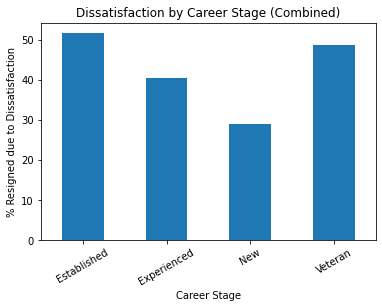

In [26]:
import matplotlib.pyplot as plt

dissatisfied_service_cat = pd.pivot_table(combined_updated, values = 'dissatisfied', index = 'service_cat')
dissatisfied_service_cat['dissatisfied'] *= 100

dissatisfied_service_cat.plot(kind = 'bar', rot = 30, 
                              title = 'Dissatisfaction by Career Stage (Combined)', legend = [],
                              xlabel = 'Career Stage', ylabel = '% Resigned due to Dissatisfaction')
plt.show()

We observe that the proportion of resignations due to dissatisfaction is higher for Established (7 - 10 years) and Veteran (> 10 years) employees.

Let's analyze the results for DETE and TAFE separately to see if the same trend occurs at both institutes.

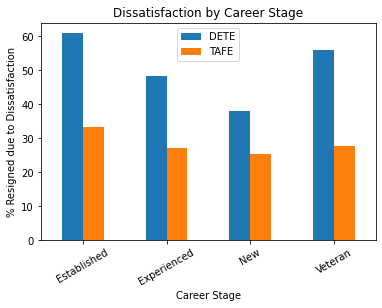

In [27]:
dete_dissatisfied_service_cat = pd.pivot_table(combined_updated[combined_updated['institute'] == 'DETE'], 
                                               values = 'dissatisfied', index = 'service_cat')
dete_dissatisfied_service_cat['dissatisfied'] *= 100

tafe_dissatisfied_service_cat = pd.pivot_table(combined_updated[combined_updated['institute'] == 'TAFE'], 
                                               values = 'dissatisfied', index = 'service_cat')
tafe_dissatisfied_service_cat['dissatisfied'] *= 100

dissatisfied_service_cat = pd.concat([dete_dissatisfied_service_cat, tafe_dissatisfied_service_cat], axis = 1)
dissatisfied_service_cat.columns = ['DETE', 'TAFE']

dissatisfied_service_cat.plot(kind = 'bar', rot = 30,
                              title = 'Dissatisfaction by Career Stage',
                              xlabel = 'Career Stage', ylabel = '% Resigned due to Dissatisfaction')
plt.show()

The same trend is observed for both DETE and TAFE, with Established employees having the highest rate of resignation due to dissatisfaction. 

Also, the dissatisfaction levels amongst resigned employees from DETE are much higher than TAFE.

**b. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?**

We will proceed to conduct similar analysis of the dissatisfaction level, but classified by age instead of years of service.

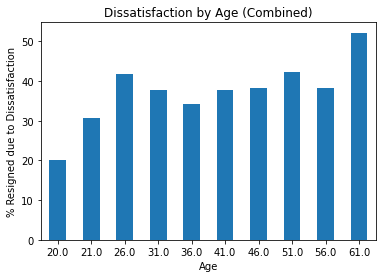

In [28]:
combined_dissatisfied_age = pd.pivot_table(combined_updated,
                                           values = 'dissatisfied', index = 'age')
combined_dissatisfied_age['dissatisfied'] *= 100

combined_dissatisfied_age.plot(kind = 'bar', rot = 0, legend = [],
                               title = 'Dissatisfaction by Age (Combined)',
                               xlabel = 'Age', ylabel = '% Resigned due to Dissatisfaction')
plt.show()

The general trend of the bar plot shows that dissatisfaction rates are highest for the oldest employees and vice-versa.

Let's break this down into separate subplots for each institute, to analyze in finer resolution.

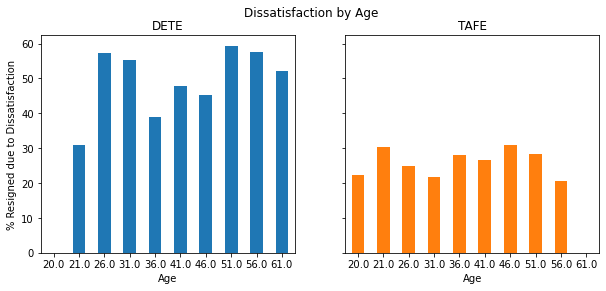

In [29]:
dete_dissatisfied_age = pd.pivot_table(combined_updated[combined_updated['institute'] == 'DETE'],
                                       values = 'dissatisfied', index = 'age')
dete_dissatisfied_age['dissatisfied'] *= 100

tafe_dissatisfied_age = pd.pivot_table(combined_updated[combined_updated['institute'] == 'TAFE'],
                                       values = 'dissatisfied', index = 'age')
tafe_dissatisfied_age['dissatisfied'] *= 100

combined_dissatisfied_age = pd.concat([dete_dissatisfied_age, tafe_dissatisfied_age], axis = 1)
combined_dissatisfied_age.columns = ['DETE', 'TAFE']

combined_dissatisfied_age.plot(kind = 'bar', rot = 0, 
                               figsize = (10, 4), subplots = True, layout = (1, 2), sharey = True,
                               title = 'Dissatisfaction by Age', legend = [],
                               xlabel = 'Age', ylabel = '% Resigned due to Dissatisfaction')
plt.show()

We can observe that:
- the overall dissatisfaction levels amongst resigned employees from DETE are much higher than TAFE
- for DETE, the dissatisfaction levels are higher amongst employees between 26 - 31 years old and 51 - 61 years old
- for TAFE, the dissatisfaction levels are higher amongst employees around 21 years old and between 36 - 51 years old

---

## 5. Conclusion

Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

- For both DETE and TAFE, employees who **resign due to dissatisfaction** have **more years of service** at the institutes
- **More employees are resigning from DETE due to dissatisfaction**, as compared to TAFE

Are younger employees resigning due to some kind of dissatisfaction? What about older employees?
- For DETE, both younger (**26 - 31 years old**) and older (**51- 61 years old**) employees are resigning due to dissatisfaction
- For TAFE, older employees (**36 - 51 years old**) are resigning due to dissatisfaction, with the exception of younger employees at around **21 years old**